<a href="https://colab.research.google.com/github/ZealPower22/Website_Traffic-management-Neural-network-and-machine-learning-algoriths-/blob/main/NNML_Real_time_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#naviyee byees
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "enhanced_website_traffic_data.csv"  # Update with your file path
data = pd.read_csv(file_path)

# Select relevant features and target variable
features = ["Traffic Source", "Pages Viewed", "Add to Cart", "Day of Week", "Hour of Day", "Weekend Flag", "Gender", "Age"]
target = "Made Purchase"

# Drop rows with missing values in selected columns
data_filtered = data[features + [target]].dropna()

# Encode categorical features
label_encoders = {}
for col in ["Traffic Source", "Gender", "Add to Cart"]:
    le = LabelEncoder()
    data_filtered[col] = le.fit_transform(data_filtered[col])
    label_encoders[col] = le

# Convert Age to numeric
data_filtered["Age"] = pd.to_numeric(data_filtered["Age"], errors='coerce')
data_filtered = data_filtered.dropna(subset=["Age"])

# Split data into features and target
X = data_filtered[features]
y = data_filtered[target].astype(int)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)


Accuracy: 78.33%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.72      0.84       233
           1       0.51      1.00      0.67        67

    accuracy                           0.78       300
   macro avg       0.75      0.86      0.76       300
weighted avg       0.89      0.78      0.80       300



In [ ]:
# Linera regression
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "enhanced_website_traffic_data.csv"  # Update with your file path
data = pd.read_csv(file_path)

# Select relevant features and target variable
features = ["Traffic Source", "Pages Viewed", "Add to Cart", "Day of Week", "Hour of Day", "Weekend Flag", "Gender", "Age"]
target = "Session Duration (seconds)"  # Predicting session duration as target

# Drop rows with missing values in selected columns
data_filtered = data[features + [target]].dropna()

# Encode categorical features
label_encoders = {}
for col in ["Traffic Source", "Gender", "Add to Cart"]:
    le = LabelEncoder()
    data_filtered[col] = le.fit_transform(data_filtered[col])
    label_encoders[col] = le

# Convert Age to numeric
data_filtered["Age"] = pd.to_numeric(data_filtered["Age"], errors='coerce')
data_filtered = data_filtered.dropna(subset=["Age"])

# Split data into features and target
X = data_filtered[features]
y = data_filtered[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 28000.54
R-squared Score: -0.02


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "enhanced_website_traffic_data.csv"  # Update with your file path
data = pd.read_csv(file_path)

# Select relevant features and target variable
features = ["Traffic Source", "Pages Viewed", "Add to Cart", "Day of Week", "Hour of Day", "Weekend Flag", "Gender", "Age"]
target = "Made Purchase"  # Predicting whether the user made a purchase

# Drop rows with missing values in selected columns
data_filtered = data[features + [target]].dropna()

# Encode categorical features
label_encoders = {}
for col in ["Traffic Source", "Gender", "Add to Cart"]:
    le = LabelEncoder()
    data_filtered[col] = le.fit_transform(data_filtered[col])
    label_encoders[col] = le

# Convert Age to numeric
data_filtered["Age"] = pd.to_numeric(data_filtered["Age"], errors='coerce')
data_filtered = data_filtered.dropna(subset=["Age"])

# Split data into features and target
X = data_filtered[features]
y = data_filtered[target].astype(int)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)


Accuracy: 75.67%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       233
           1       0.43      0.30      0.35        67

    accuracy                           0.76       300
   macro avg       0.62      0.59      0.60       300
weighted avg       0.73      0.76      0.74       300



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Step 0: Load the data
traffic_data = pd.read_csv('enhanced_website_traffic_data.csv')  # Replace with actual path

# Step 1: Feature Engineering
traffic_data['Timestamp'] = pd.to_datetime(traffic_data['Timestamp'])
traffic_data = traffic_data.sort_values(by=['User ID', 'Timestamp'])
traffic_data['Hour of Day'] = traffic_data['Timestamp'].dt.hour
traffic_data['Day of Week'] = traffic_data['Timestamp'].dt.weekday

# Create additional features if necessary
traffic_data['Session Duration (seconds)'] = traffic_data['Session Duration (seconds)']
traffic_data['Made Purchase'] = traffic_data['Made Purchase'].astype(int)

# Step 2: Handle Missing Data
traffic_data.fillna(method='ffill', inplace=True)  # Forward fill missing data

# Step 3: Prepare User-Level Data
user_data = traffic_data[['User ID', 'Session Duration (seconds)', 'Hour of Day', 'Day of Week', 'Made Purchase']]

# Step 4: Feature Scaling
scaler = StandardScaler()
user_data_scaled = scaler.fit_transform(user_data[['Session Duration (seconds)', 'Hour of Day', 'Day of Week']])

# Add 'Made Purchase' as labels
labels = user_data['Made Purchase'].values

# Step 5: Train-Test Split (stratified for balance)
X_train, X_test, y_train, y_test = train_test_split(user_data_scaled, labels, test_size=0.2, stratify=labels, random_state=42)

# Step 6: Generate Time Series Data for LSTM
sequence_length = 10
train_generator = TimeseriesGenerator(X_train, y_train, length=sequence_length, batch_size=32)
test_generator = TimeseriesGenerator(X_test, y_test, length=sequence_length, batch_size=32)

# Step 7: Build the LSTM Model with enhancements
model = Sequential()

# Add LSTM layer
model.add(LSTM(50, activation='tanh', input_shape=(sequence_length, X_train.shape[1])))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Add Early Stopping for early termination if the model stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 9: Train the Model
history = model.fit(train_generator, validation_data=test_generator, epochs=30, verbose=1, callbacks=[early_stopping])

# Step 10: Evaluate the Model
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Epoch 1/30


<ipython-input-6-3826ebfdcb66>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  traffic_data.fillna(method='ffill', inplace=True)  # Forward fill missing data
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5513 - loss: 0.6900 - val_accuracy: 0.7579 - val_loss: 0.6303
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7718 - loss: 0.6108 - val_accuracy: 0.7579 - val_loss: 0.5462
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7491 - loss: 0.5660 - val_accuracy: 0.7579 - val_loss: 0.5557
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7714 - loss: 0.5363 - val_accuracy: 0.7579 - val_loss: 0.5607
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7225 - loss: 0.5896 - val_accuracy: 0.7579 - val_loss: 0.5606
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7680 - loss: 0.5349 - val_accuracy: 0.7579 - val_loss: 0.5646
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7693 - loss: 0.5408 - val_accuracy: 0.7579 - val_loss: 0.5651
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7305 - loss: 0.5830 
Test Loss: 0.5461781024932861
Test Accuracy: 0.757894754

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator  # Import TimeseriesGenerator

# Step 0: Load the data
traffic_data = pd.read_csv('enhanced_website_traffic_data.csv')  # Replace with actual path

# Step 1: Feature Engineering
traffic_data['Timestamp'] = pd.to_datetime(traffic_data['Timestamp'])
traffic_data = traffic_data.sort_values(by=['User ID', 'Timestamp'])
traffic_data['Hour of Day'] = traffic_data['Timestamp'].dt.hour
traffic_data['Day of Week'] = traffic_data['Timestamp'].dt.weekday
traffic_data['Month'] = traffic_data['Timestamp'].dt.month  # Add Month of Year as a feature
traffic_data['Session Duration (seconds)'] = traffic_data['Session Duration (seconds)']
traffic_data['Made Purchase'] = traffic_data['Made Purchase'].astype(int)

# Step 2: Handle Missing Data
traffic_data.fillna(method='ffill', inplace=True)  # Forward fill missing data

# Step 3: Prepare User-Level Data
user_data = traffic_data[['User ID', 'Session Duration (seconds)', 'Hour of Day', 'Day of Week', 'Month', 'Made Purchase']]

# Step 4: Feature Scaling
scaler = StandardScaler()
user_data_scaled = scaler.fit_transform(user_data[['Session Duration (seconds)', 'Hour of Day', 'Day of Week', 'Month']])

# Add 'Made Purchase' as labels
labels = user_data['Made Purchase'].values

# Step 5: Train-Test Split (stratified for balance)
X_train, X_test, y_train, y_test = train_test_split(user_data_scaled, labels, test_size=0.2, stratify=labels, random_state=42)

# Step 6: Generate Time Series Data for LSTM
sequence_length = 10
train_generator = TimeseriesGenerator(X_train, y_train, length=sequence_length, batch_size=32)
test_generator = TimeseriesGenerator(X_test, y_test, length=sequence_length, batch_size=32)

# Step 7: Build the LSTM Model with enhancements
model = Sequential()

# Add Bidirectional LSTM layer
model.add(Bidirectional(LSTM(50, activation='tanh', return_sequences=True), input_shape=(sequence_length, X_train.shape[1])))
model.add(Dropout(0.3))  # Increase dropout to reduce overfitting
model.add(BatchNormalization())  # Batch normalization for better convergence
model.add(LSTM(50, activation='tanh'))
model.add(Dropout(0.3))  # Dropout to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Add Early Stopping and Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

# Step 9: Train the Model
history = model.fit(train_generator, validation_data=test_generator, epochs=50, verbose=1, callbacks=[early_stopping, lr_scheduler])

# Step 10: Evaluate the Model
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Step 11: Classification Report (Precision, Recall, F1-Score)
y_pred = (model.predict(test_generator) > 0.5).astype(int)  # Binarize predictions

# Flatten the predictions and true labels
y_pred_flat = y_pred.flatten()
y_test_flat = y_test[:len(y_pred_flat)]  # Make sure y_test matches the length of y_pred

# Print the classification report
print(classification_report(y_test_flat, y_pred_flat))


Epoch 1/50


<ipython-input-7-2918e6672a1b>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  traffic_data.fillna(method='ffill', inplace=True)  # Forward fill missing data
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.6208 - loss: 0.6496 - val_accuracy: 0.7579 - val_loss: 0.6225 - learning_rate: 0.0010
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7331 - loss: 0.5689 - val_accuracy: 0.7579 - val_loss: 0.6114 - learning_rate: 0.0010
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7584 - loss: 0.5399 - val_accuracy: 0.7579 - val_loss: 0.5980 - learning_rate: 0.0010
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7555 - loss: 0.5341 - val_accuracy: 0.7579 - val_loss: 0.5911 - learning_rate: 0.0010
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7491 - loss: 0.5385 - val_accuracy: 0.7579 - val_loss: 0.5819 - learning_rate: 0.0010
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7529 - loss: 0.5335 - val_accuracy: 0.7579 - val_loss: 0.5758 - learning_rate: 0.0010
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7518 - loss: 0.5296 - val_accuracy: 0.75

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from collections import Counter

# Load the dataset
file_path = "enhanced_website_traffic_data.csv"  # Update with your file path
data = pd.read_csv(file_path)

# Select relevant features and target variable
features = ["Traffic Source", "Pages Viewed", "Add to Cart", "Day of Week", "Hour of Day", "Weekend Flag", "Gender", "Age"]
target = "Made Purchase"

# Drop rows with missing values in selected columns
data_filtered = data[features + [target]].dropna()

# Encode categorical features
label_encoders = {}
for col in ["Traffic Source", "Gender", "Add to Cart"]:
    data_filtered[col] = pd.factorize(data_filtered[col])[0]

# Convert Age to numeric
data_filtered["Age"] = pd.to_numeric(data_filtered["Age"], errors='coerce')
data_filtered = data_filtered.dropna(subset=["Age"])

# Function to calculate entropy
def entropy(target_col):
    values, counts = np.unique(target_col, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

# Function to calculate Information Gain
def info_gain(data, feature, target="Made Purchase"):
    total_entropy = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = sum((counts[i] / sum(counts)) * entropy(data[data[feature] == values[i]][target]) for i in range(len(values)))
    return total_entropy - weighted_entropy

# Function to build the ID3 tree
def id3(data, features, target="Made Purchase"):
    if len(np.unique(data[target])) == 1:
        return np.unique(data[target])[0]
    if len(features) == 0:
        return Counter(data[target]).most_common(1)[0][0]

    gains = {feature: info_gain(data, feature) for feature in features}
    best_feature = max(gains, key=gains.get)
    tree = {best_feature: {}}

    for value in np.unique(data[best_feature]):
        subset = data[data[best_feature] == value]
        tree[best_feature][value] = id3(subset, [f for f in features if f != best_feature])

    return tree

# Build the decision tree
features = [col for col in data_filtered.columns if col != "Made Purchase"]
decision_tree = id3(data_filtered, features)
print("Decision Tree:")
print(decision_tree)


Decision Tree:
{'Add to Cart': {0: {'Age': {18: {'Traffic Source': {0: True, 1: False, 2: False, 3: False, 4: True}}, 19: {'Hour of Day': {0: True, 1: False, 2: False, 7: True, 10: {'Traffic Source': {1: True, 3: False}}, 16: True, 19: True, 21: {'Traffic Source': {1: False, 4: True}}, 23: True}}, 20: {'Hour of Day': {1: True, 5: True, 7: False, 9: False, 15: {'Traffic Source': {0: True, 3: False}}, 16: False, 20: True, 22: False}}, 21: {'Hour of Day': {0: False, 2: True, 7: False, 8: False, 10: True, 11: False, 14: True, 15: False, 16: False, 18: False, 21: True, 23: False}}, 22: {'Day of Week': {0: False, 1: False, 2: False, 4: False, 5: True}}, 23: {'Hour of Day': {4: False, 8: {'Pages Viewed': {5: False, 7: True, 10: True}}, 9: True, 12: False, 15: False, 16: True, 22: True}}, 24: {'Hour of Day': {1: False, 3: True, 4: True, 5: False, 6: True, 8: True, 10: False, 14: False, 15: False, 20: {'Pages Viewed': {4: True, 10: False}}, 21: False, 22: False, 23: True}}, 25: {'Pages Viewed':

In [ ]:
import graphviz
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "enhanced_website_traffic_data.csv"  # Update with your file path
data = pd.read_csv(file_path)

# Select relevant features and target variable
features = ["Traffic Source", "Pages Viewed", "Add to Cart", "Day of Week", "Hour of Day", "Weekend Flag", "Gender", "Age"]
target = "Made Purchase"

# Drop rows with missing values in selected columns
data_filtered = data[features + [target]].dropna()

# Encode categorical features
label_encoders = {}
for col in ["Traffic Source", "Gender", "Add to Cart"]:
    le = LabelEncoder()
    data_filtered[col] = le.fit_transform(data_filtered[col])
    label_encoders[col] = le

# Convert Age to numeric
data_filtered["Age"] = pd.to_numeric(data_filtered["Age"], errors='coerce')
data_filtered = data_filtered.dropna(subset=["Age"])

# Split data into features and target
X = data_filtered[features]
y = data_filtered[target].astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a Decision Tree model
model = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Create DOT representation of the decision tree
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=features,
    class_names=["No Purchase", "Made Purchase"],
    filled=True,
    rounded=True,
    special_characters=True
)

# Render the decision tree and save as PNG
graph = graphviz.Source(dot_data)
graph.render("website_decision_tree", format="png", cleanup=False)  # Saves as 'website_decision_tree.png'
graph.view()  # Opens the generated image


'website_decision_tree.pdf'

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

# Load the dataset
file_path = "enhanced_website_traffic_data.csv"  # Update with your file path
data = pd.read_csv(file_path)

# Select relevant features and target variable
features = ["Traffic Source", "Pages Viewed", "Add to Cart", "Day of Week", "Hour of Day", "Weekend Flag", "Gender", "Age"]
target = "Made Purchase"

# Drop rows with missing values in selected columns
data_filtered = data[features + [target]].dropna()

# Encode categorical features
label_encoders = {}
for col in ["Traffic Source", "Gender", "Add to Cart"]:
    data_filtered[col] = pd.factorize(data_filtered[col])[0]

# Convert Age to numeric
data_filtered["Age"] = pd.to_numeric(data_filtered["Age"], errors='coerce')
data_filtered = data_filtered.dropna(subset=["Age"])

# Function to calculate entropy
def entropy(target_col):
    values, counts = np.unique(target_col, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Avoid log(0)

# Function to calculate information gain for continuous and categorical features
def info_gain(data, feature, target="Made Purchase"):
    total_entropy = entropy(data[target])

    # Check if the feature is continuous or categorical
    if data[feature].dtype == 'float64' or data[feature].dtype == 'int64':
        # Sort and calculate the mean of consecutive values for possible splits
        sorted_values = data[feature].sort_values().unique()
        split_points = (sorted_values[:-1] + sorted_values[1:]) / 2

        best_gain = 0
        best_split = None

        for split in split_points:
            left_split = data[data[feature] <= split]
            right_split = data[data[feature] > split]
            weighted_entropy = (len(left_split) / len(data)) * entropy(left_split[target]) + \
                               (len(right_split) / len(data)) * entropy(right_split[target])
            gain = total_entropy - weighted_entropy
            if gain > best_gain:
                best_gain = gain
                best_split = split

        return best_gain, best_split
    else:
        # Categorical feature - calculate entropy for each category
        values, counts = np.unique(data[feature], return_counts=True)
        weighted_entropy = sum((counts[i] / sum(counts)) * entropy(data[data[feature] == values[i]][target]) for i in range(len(values)))
        gain = total_entropy - weighted_entropy
        return gain, None

# Function to build the C4.5 decision tree
def c45(data, features, target="Made Purchase"):
    # If all target values are the same, return that value
    if len(np.unique(data[target])) == 1:
        return np.unique(data[target])[0]

    # If no features are left, return the most common target value
    if len(features) == 0:
        return Counter(data[target]).most_common(1)[0][0]

    # Calculate information gain for all features and choose the best one
    gains = {}
    splits = {}
    for feature in features:
        gain, split = info_gain(data, feature)
        gains[feature] = gain
        splits[feature] = split

    best_feature = max(gains, key=gains.get)
    best_split = splits[best_feature]

    # Create a tree node
    tree = {best_feature: {}}

    # Check if it's a continuous feature with a split
    if best_split is not None:
        left_split = data[data[best_feature] <= best_split]
        right_split = data[data[best_feature] > best_split]

        # Recursively build the tree
        tree[best_feature][f"<= {best_split}"] = c45(left_split, [f for f in features if f != best_feature])
        tree[best_feature][f"> {best_split}"] = c45(right_split, [f for f in features if f != best_feature])
    else:
        # Categorical feature - split based on unique values
        for value in np.unique(data[best_feature]):
            subset = data[data[best_feature] == value]
            tree[best_feature][value] = c45(subset, [f for f in features if f != best_feature])

    return tree

# Build the decision tree using C4.5
features = [col for col in data_filtered.columns if col != "Made Purchase"]
decision_tree_c45 = c45(data_filtered, features)

print("C4.5 Decision Tree:")
print(decision_tree_c45)


C4.5 Decision Tree:
{'Add to Cart': {'<= 0.5': {'Pages Viewed': {'<= 6.5': {'Hour of Day': {'<= 18.5': {'Day of Week': {'<= 3.5': {'Age': {'<= 50.0': {'Gender': {'<= 0.5': {'Traffic Source': {'<= 2.5': {'Weekend Flag': {0: False}}, '> 2.5': {'Weekend Flag': {0: True}}}}, '> 0.5': {'Traffic Source': {'<= 3.5': {'Weekend Flag': {0: False}}, '> 3.5': {'Weekend Flag': {0: False}}}}}}, '> 50.0': {'Traffic Source': {'<= 3.5': {'Gender': {'<= 0.5': {'Weekend Flag': {0: True}}, '> 0.5': {'Weekend Flag': {0: True}}}}, '> 3.5': True}}}}, '> 3.5': {'Traffic Source': {'<= 0.5': {'Age': {'<= 58.5': {'Gender': {'<= 0.5': {'Weekend Flag': {'<= 0.5': True, '> 0.5': True}}, '> 0.5': {'Weekend Flag': {'<= 0.5': False, '> 0.5': True}}}}, '> 58.5': {'Gender': {'<= 0.5': {'Weekend Flag': {'<= 0.5': True, '> 0.5': True}}, '> 0.5': True}}}}, '> 0.5': {'Age': {'<= 45.5': {'Weekend Flag': {'<= 0.5': {'Gender': {'<= 0.5': False, '> 0.5': True}}, '> 0.5': {'Gender': {'<= 0.5': True, '> 0.5': True}}}}, '> 45.5': 

In [ ]:
# Candidate elimination algorithm
import pandas as pd
import numpy as np

# Load the dataset
file_path = "enhanced_website_traffic_data.csv"  # Update with your file path
data = pd.read_csv(file_path)

# Select relevant features and target variable
features = ["Traffic Source", "Pages Viewed", "Add to Cart", "Day of Week", "Hour of Day", "Weekend Flag", "Gender", "Age"]
target = "Made Purchase"

# Drop rows with missing values in selected columns
data_filtered = data[features + [target]].dropna()

# Encode categorical features to numerical values
categorical_cols = ["Traffic Source", "Gender", "Add to Cart"]
for col in categorical_cols:
    data_filtered[col] = pd.factorize(data_filtered[col])[0]

# Convert Age to numeric and drop NaNs
data_filtered["Age"] = pd.to_numeric(data_filtered["Age"], errors='coerce')
data_filtered = data_filtered.dropna(subset=["Age"])

# Split data into features and target
X = data_filtered[features].values
y = data_filtered[target].values

# Define the most specific and most general hypotheses
def initialize_hypotheses(n_features):
    specific_hypothesis = ["0"] * n_features
    general_hypothesis = [["?"] * n_features]
    return specific_hypothesis, general_hypothesis

# Check consistency of a hypothesis
def is_consistent(hypothesis, instance):
    for i in range(len(hypothesis)):
        if hypothesis[i] != "?" and hypothesis[i] != instance[i]:
            return False
    return True

# Candidate Elimination algorithm
def candidate_elimination(X, y):
    n_features = X.shape[1]
    S, G = initialize_hypotheses(n_features)

    for i, instance in enumerate(X):
        if y[i] == 1:  # Positive instance
            for j in range(n_features):
                if S[j] == "0":
                    S[j] = instance[j]
                elif S[j] != instance[j]:
                    S[j] = "?"
            G = [g for g in G if is_consistent(g, instance)]
        else:  # Negative instance
            G_new = []
            for g in G:
                if not is_consistent(g, instance):
                    G_new.append(g)
                    for j in range(n_features):
                        if g[j] == "?":
                            new_hypothesis = g[:]
                            new_hypothesis[j] = S[j] if S[j] != "?" else instance[j]
                            G_new.append(new_hypothesis)
            G = G_new
        G = generalize_G(G, S)

    return S, G

# Generalize G to remove inconsistent hypotheses
def generalize_G(G, S):
    G_new = []
    for g in G:
        if any(S[j] != "?" and S[j] != g[j] for j in range(len(S))):
            continue
        G_new.append(g)
    return G_new

# Run Candidate Elimination
S_final, G_final = candidate_elimination(X, y)

# Display the final hypotheses
print("Final Specific Hypothesis (S):", S_final)
print("Final General Hypothesis (G):", G_final)


Final Specific Hypothesis (S): ['?', '?', 0, '?', '?', '?', '?', '?']
Final General Hypothesis (G): []


In [ ]:
# Find s algorithm
import pandas as pd
import numpy as np

# Load the dataset
file_path = "enhanced_website_traffic_data.csv"  # Update with your file path
data = pd.read_csv(file_path)

# Select relevant features and target variable
features = ["Traffic Source", "Pages Viewed", "Add to Cart", "Day of Week", "Hour of Day", "Weekend Flag", "Gender", "Age"]
target = "Made Purchase"

# Drop rows with missing values in selected columns
data_filtered = data[features + [target]].dropna()

# Encode categorical features to numerical values
categorical_cols = ["Traffic Source", "Gender", "Add to Cart"]
for col in categorical_cols:
    data_filtered[col] = pd.factorize(data_filtered[col])[0]

# Convert Age to numeric and drop NaNs
data_filtered["Age"] = pd.to_numeric(data_filtered["Age"], errors='coerce')
data_filtered = data_filtered.dropna(subset=["Age"])

# Split data into features and target
X = data_filtered[features].values
y = data_filtered[target].values

# Function to implement Find-S algorithm
def find_s(X, y):
    n_features = X.shape[1]
    # Initialize the most specific hypothesis
    hypothesis = ["0"] * n_features

    # Loop through training data to update the hypothesis
    for i, instance in enumerate(X):
        if y[i] == 1:  # Positive instance
            for j in range(n_features):
                if hypothesis[j] == "0":  # Initialize first positive instance
                    hypothesis[j] = instance[j]
                elif hypothesis[j] != instance[j]:
                    hypothesis[j] = "?"  # Generalize hypothesis if different values occur
    return hypothesis

# Run Find-S algorithm
final_hypothesis = find_s(X, y)

# Display the final hypothesis
print("Final Hypothesis Learned by Find-S Algorithm:", final_hypothesis)


Final Hypothesis Learned by Find-S Algorithm: ['?', '?', 0, '?', '?', '?', '?', '?']


In [ ]:
!pip install pdfkit

In [ ]:
!pip install pandas matplotlib seaborn fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=335ef1fe95947dcdf21d45dd41c4b5306a4142835d86a5078ed9dcc66af9960a
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


<ipython-input-8-7c3f1d14eb25>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Traffic Source"], order=df["Traffic Source"].value_counts().index, palette="viridis")
<ipython-input-8-7c3f1d14eb25>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Device Type"], palette="coolwarm")
<ipython-input-8-7c3f1d14eb25>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Made Purchase"], palette="Set2")
<ipython-input-8-7c3f1d14eb25>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

PDF Report Generated: website_traffic_visualizations.pdf


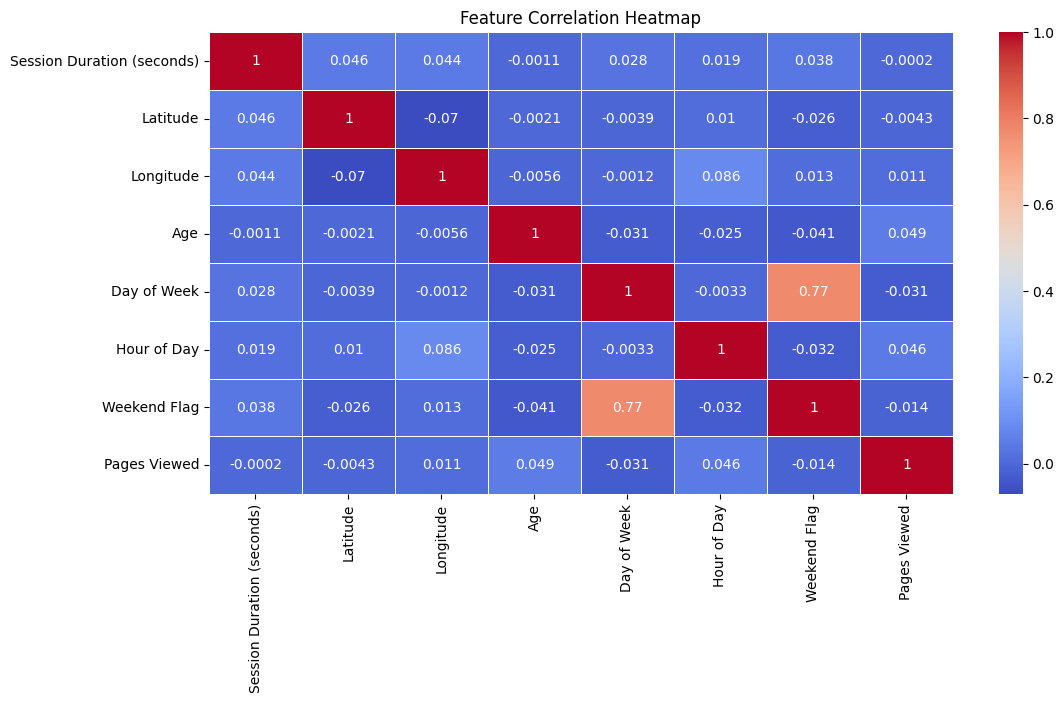

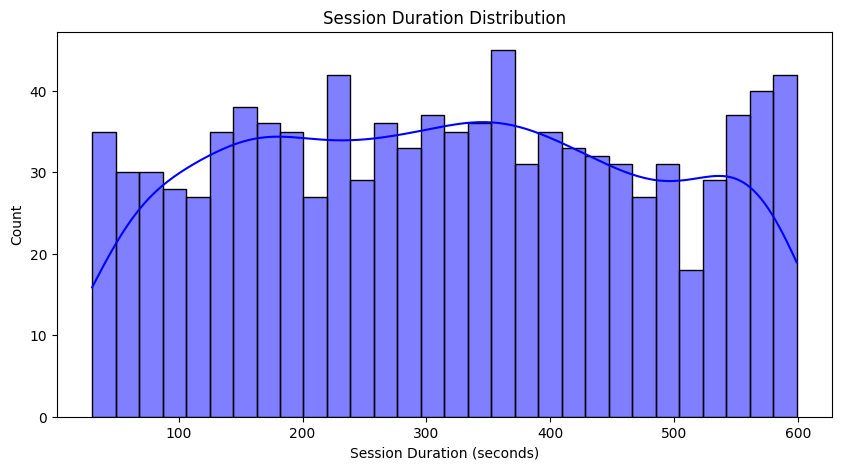

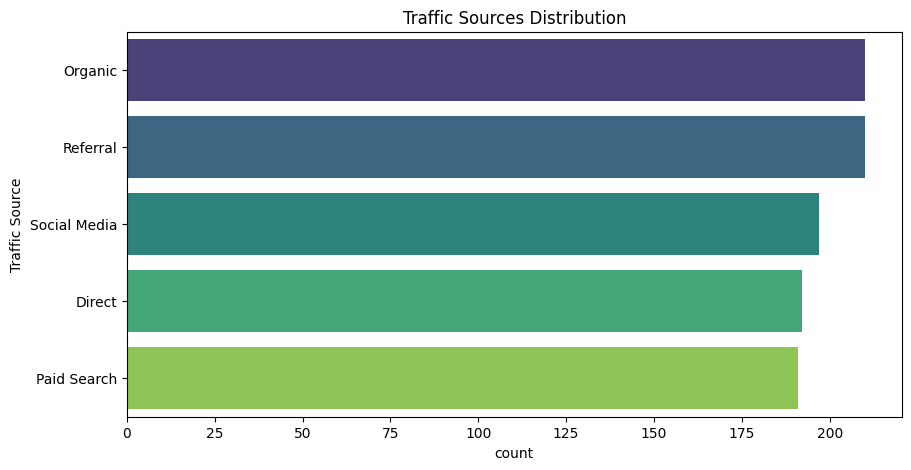

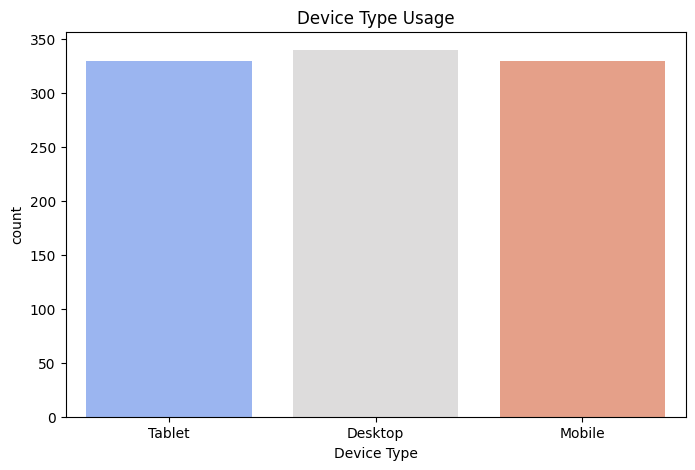

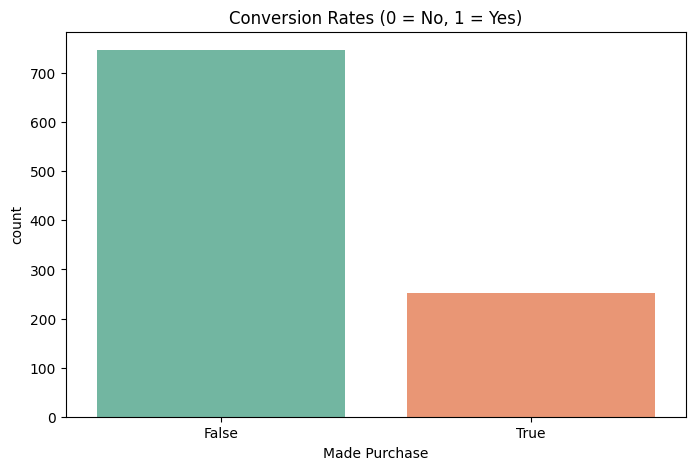

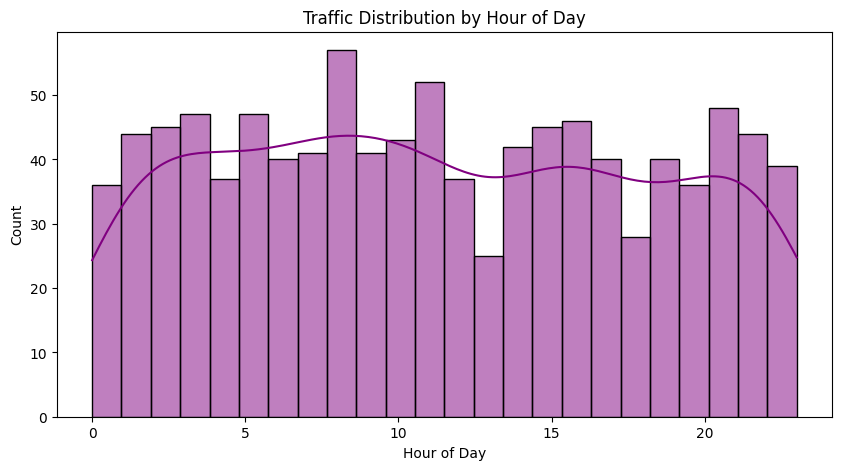

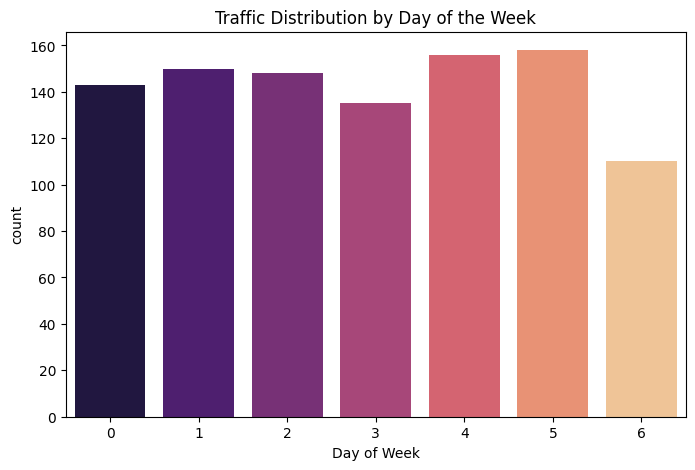

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

# Load dataset
file_path = "/content/enhanced_website_traffic_data.csv"
df = pd.read_csv(file_path)

# Convert timestamp columns to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Session Start Time'] = pd.to_datetime(df['Session Start Time'])
df['Session End Time'] = pd.to_datetime(df['Session End Time'])

# Drop irrelevant columns for numeric analysis
numeric_df = df.select_dtypes(include=['number'])

# Set up PDF report
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

def save_and_add_plot(title, filename):
    """Saves the plot and adds it to the PDF report"""
    plt.savefig(filename, bbox_inches="tight")
    pdf.add_page()
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, title, ln=True, align='C')
    pdf.image(filename, x=10, y=30, w=180)

# --- Correlation Heatmap ---
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
save_and_add_plot("Feature Correlation Heatmap", "correlation_heatmap.png")

# --- Session Duration Distribution ---
plt.figure(figsize=(10, 5))
sns.histplot(df["Session Duration (seconds)"], bins=30, kde=True, color='blue')
plt.title("Session Duration Distribution")
save_and_add_plot("Session Duration Distribution", "session_duration.png")

# --- Traffic Source Analysis ---
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Traffic Source"], order=df["Traffic Source"].value_counts().index, palette="viridis")
plt.title("Traffic Sources Distribution")
save_and_add_plot("Traffic Sources Distribution", "traffic_sources.png")

# --- Device Type Usage ---
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Device Type"], palette="coolwarm")
plt.title("Device Type Usage")
save_and_add_plot("Device Type Usage", "device_usage.png")

# --- Conversion Rate Analysis ---
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Made Purchase"], palette="Set2")
plt.title("Conversion Rates (0 = No, 1 = Yes)")
save_and_add_plot("Conversion Rates", "conversion_rates.png")

# --- Hourly Traffic Analysis ---
plt.figure(figsize=(10, 5))
sns.histplot(df["Hour of Day"], bins=24, kde=True, color='purple')
plt.title("Traffic Distribution by Hour of Day")
save_and_add_plot("Traffic by Hour", "traffic_hour.png")

# --- Daily Traffic Analysis ---
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Day of Week"], palette="magma")
plt.title("Traffic Distribution by Day of the Week")
save_and_add_plot("Traffic by Day", "traffic_day.png")

# Save the PDF Report
pdf.output("website_traffic_visualizations.pdf")
print("PDF Report Generated: website_traffic_visualizations.pdf")

plt.show()


Epoch 1/100, Loss: 7.0460
Epoch 11/100, Loss: 4.7109
Epoch 21/100, Loss: 4.7003
Epoch 31/100, Loss: 4.6981
Epoch 41/100, Loss: 4.6975
Epoch 51/100, Loss: 4.6973
Epoch 61/100, Loss: 4.6973
Epoch 71/100, Loss: 4.6972
Epoch 81/100, Loss: 4.6972
Epoch 91/100, Loss: 4.6972
Final Model Accuracy: 74.00%


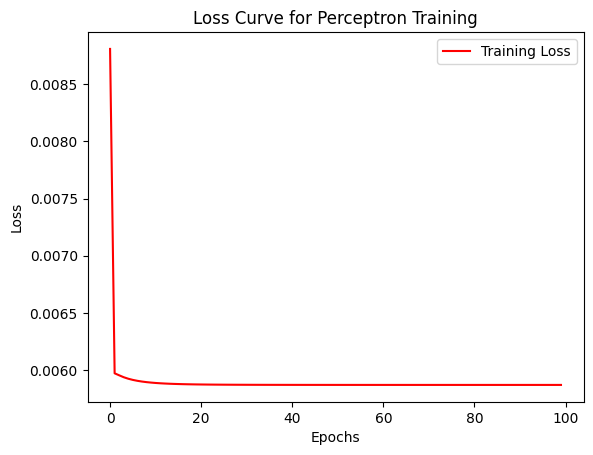

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv('/content/enhanced_website_traffic_data.csv')

# Convert categorical features to numerical encoding
df['Traffic Source'] = df['Traffic Source'].astype('category').cat.codes
df['Device Type'] = df['Device Type'].astype('category').cat.codes
df['Region'] = df['Region'].astype('category').cat.codes  # Encoding region

# Select features and target
features = ['Session Duration (seconds)', 'Pages Viewed', 'Traffic Source', 'Device Type', 'Hour of Day', 'Weekend Flag', 'Region']
X = df[features].values
y = df['Made Purchase'].astype(int).values  # Target: 1 for converted users, 0 otherwise

# Normalize features for better convergence
X = X / np.max(X, axis=0)

# Split data into training and testing sets (80% train, 20% test)
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Initialize Weights & Bias
np.random.seed(42)
weights = np.random.rand(X.shape[1])
bias = np.random.rand(1)
learning_rate = 0.05
epochs = 100
batch_size = 32  # Mini-batch size

# Activation Function (Sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid (for gradient update)
def sigmoid_derivative(x):
    return x * (1 - x)

# Train the Perceptron using Mini-Batch Gradient Descent
losses = []
for epoch in range(epochs):
    total_loss = 0
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]

        # Compute weighted sum & apply activation function
        weighted_sum = np.dot(X_batch, weights) + bias
        predictions = sigmoid(weighted_sum)

        # Compute error
        error = y_batch - predictions
        loss = np.mean(error**2)  # Mean Squared Error (MSE)
        total_loss += loss

        # Compute gradients
        gradient = error * sigmoid_derivative(predictions)

        # Update weights & bias
        weights += learning_rate * np.dot(X_batch.T, gradient)
        bias += learning_rate * np.sum(gradient)

    # Store loss for visualization
    losses.append(total_loss / len(X_train))

    # Print epoch progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

# Model Evaluation on Test Data
test_predictions = sigmoid(np.dot(X_test, weights) + bias)
test_predictions = (test_predictions > 0.5).astype(int)  # Convert to binary output

# Compute accuracy
accuracy = np.mean(test_predictions == y_test) * 100
print(f"Final Model Accuracy: {accuracy:.2f}%")

# Plot Loss Curve
plt.plot(range(epochs), losses, label="Training Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve for Perceptron Training")
plt.legend()
plt.show()


Epoch 1/100, Loss: 5.1037
Epoch 11/100, Loss: 4.6393
Epoch 21/100, Loss: 4.6001
Epoch 31/100, Loss: 4.5736
Epoch 41/100, Loss: 4.5472
Epoch 51/100, Loss: 4.5195
Epoch 61/100, Loss: 4.4960
Epoch 71/100, Loss: 4.4765
Epoch 81/100, Loss: 4.4650
Epoch 91/100, Loss: 4.4523
Final Model Accuracy: 74.00%


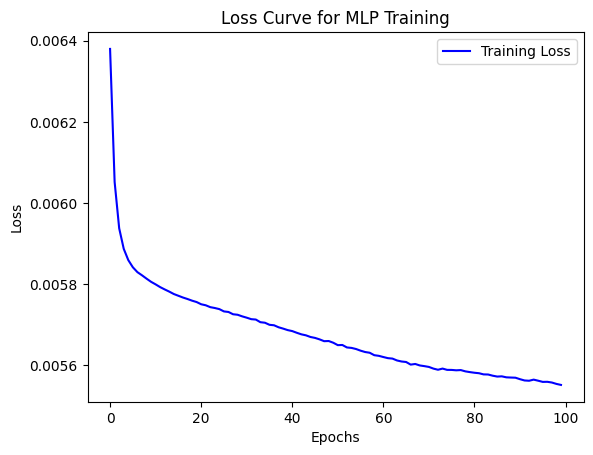

In [ ]:
# MUlti Layer Perceptron
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv('/content/enhanced_website_traffic_data.csv')

df['Traffic Source'] = df['Traffic Source'].astype('category').cat.codes
df['Device Type'] = df['Device Type'].astype('category').cat.codes
df['Region'] = df['Region'].astype('category').cat.codes  # Encoding region

# Select features and target
features = ['Session Duration (seconds)', 'Pages Viewed', 'Traffic Source', 'Device Type', 'Hour of Day', 'Weekend Flag', 'Region']
X = df[features].values
y = df['Made Purchase'].astype(int).values  # Target: 1 for converted users, 0 otherwise

# Normalize features for better convergence
X = X / np.max(X, axis=0)

# Split data into training and testing sets (80% train, 20% test)
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define MLP architecture
input_size = X.shape[1]
hidden_size = 8  # Number of neurons in hidden layer
output_size = 1  # Binary classification (0 or 1)
learning_rate = 0.05
epochs = 100
batch_size = 32

# Initialize Weights & Biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Activation Functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Train the MLP using Mini-Batch Gradient Descent
losses = []
for epoch in range(epochs):
    total_loss = 0
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size].reshape(-1, 1)

        # Forward Pass
        Z1 = np.dot(X_batch, W1) + b1
        A1 = relu(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = sigmoid(Z2)

        # Compute Loss (Mean Squared Error)
        error = y_batch - A2
        loss = np.mean(error ** 2)
        total_loss += loss

        # Backpropagation
        dA2 = error * sigmoid_derivative(A2)
        dW2 = np.dot(A1.T, dA2)
        db2 = np.sum(dA2, axis=0, keepdims=True)

        dA1 = np.dot(dA2, W2.T) * relu_derivative(A1)
        dW1 = np.dot(X_batch.T, dA1)
        db1 = np.sum(dA1, axis=0, keepdims=True)

        # Update Weights
        W2 += learning_rate * dW2
        b2 += learning_rate * db2
        W1 += learning_rate * dW1
        b1 += learning_rate * db1

    # Store loss for visualization
    losses.append(total_loss / len(X_train))

    # Print epoch progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

# Model Evaluation on Test Data
Z1_test = np.dot(X_test, W1) + b1
A1_test = relu(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
test_predictions = sigmoid(Z2_test)
test_predictions = (test_predictions > 0.5).astype(int)  # Convert to binary output

# Compute accuracy
accuracy = np.mean(test_predictions == y_test.reshape(-1, 1)) * 100
print(f"Final Model Accuracy: {accuracy:.2f}%")

# Plot Loss Curve
plt.plot(range(epochs), losses, label="Training Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve for MLP Training")
plt.legend()
plt.show()


Epoch 0 - Loss: 0.2170
Epoch 100 - Loss: 0.1915
Epoch 200 - Loss: 0.1900
Epoch 300 - Loss: 0.1897
Epoch 400 - Loss: 0.1895
Epoch 500 - Loss: 0.1893
Epoch 600 - Loss: 0.1891
Epoch 700 - Loss: 0.1890
Epoch 800 - Loss: 0.1890
Epoch 900 - Loss: 0.1889
Final Accuracy: 74.70%


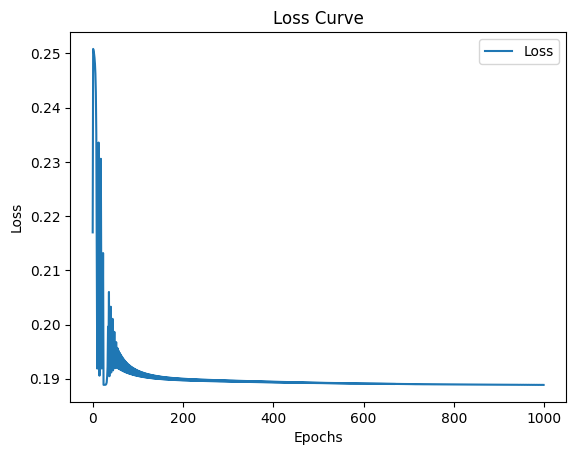

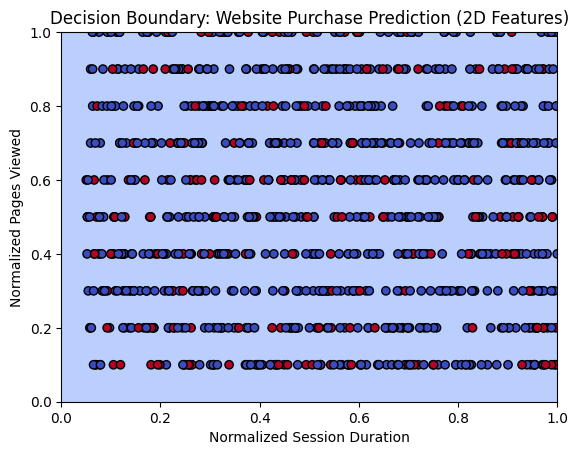

In [ ]:
#BACKPROPAGATION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/enhanced_website_traffic_data.csv')

# Select only two numerical features for 2D visualization
X = df[['Session Duration (seconds)', 'Pages Viewed']].values
y = df['Made Purchase'].astype(int).values.reshape(-1, 1)

# Normalize features for training
X = X / np.max(X, axis=0)

# Initialize parameters
np.random.seed(42)
input_size = X.shape[1]
hidden_size = 4
output_size = 1
lr = 0.05
epochs = 1000

# Xavier Initialization
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1. / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1. / hidden_size)
b2 = np.zeros((1, output_size))

# Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training Loop
losses = []
for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Loss
    loss = np.mean((y - A2) ** 2)
    losses.append(loss)

    # Backward pass
    dA2 = (y - A2)
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W1 += lr * dW1
    b1 += lr * db1
    W2 += lr * dW2
    b2 += lr * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch} - Loss: {loss:.4f}")

# Final prediction and accuracy
final_preds = sigmoid(np.dot(sigmoid(np.dot(X, W1) + b1), W2) + b2)
binary_preds = (final_preds > 0.5).astype(int)
accuracy = np.mean(binary_preds == y) * 100
print(f"Final Accuracy: {accuracy:.2f}%")

# Loss Curve
plt.plot(losses, label='Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

# Decision Boundary (for 2D input features)
x1_vals, x2_vals = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))
grid = np.c_[x1_vals.ravel(), x2_vals.ravel()]
Z1_grid = sigmoid(np.dot(grid, W1) + b1)
Z2_grid = sigmoid(np.dot(Z1_grid, W2) + b2)
Z_final = Z2_grid.reshape(x1_vals.shape)

plt.contourf(x1_vals, x2_vals, Z_final, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap='coolwarm')
plt.title('Decision Boundary: Website Purchase Prediction (2D Features)')
plt.xlabel('Normalized Session Duration')
plt.ylabel('Normalized Pages Viewed')
plt.show()


KNN Accuracy (k=5): 73.50%


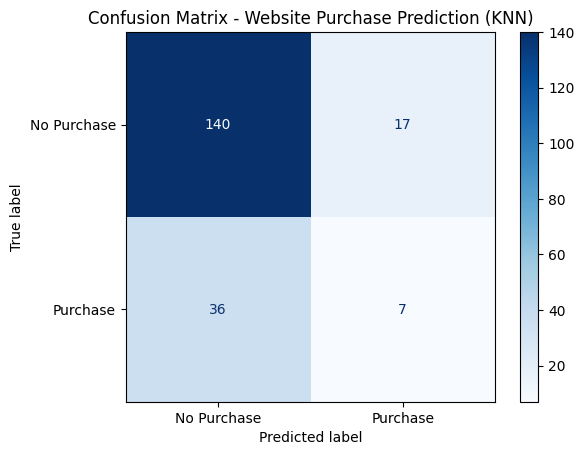

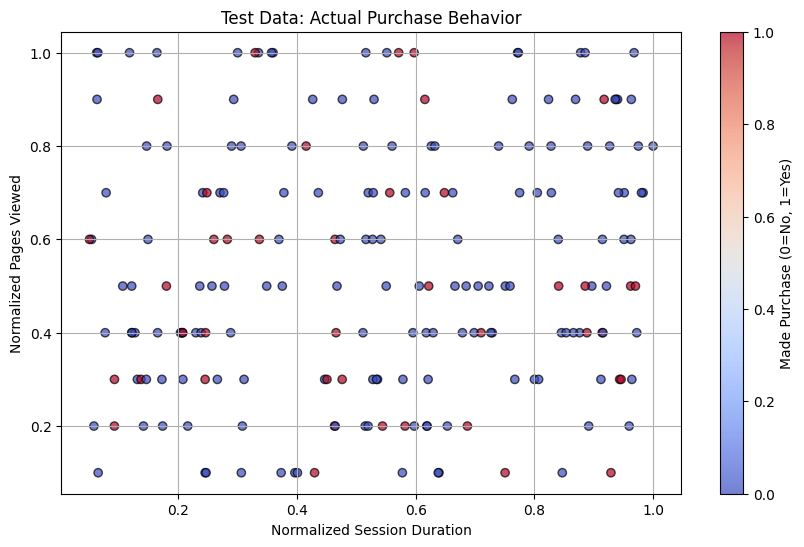

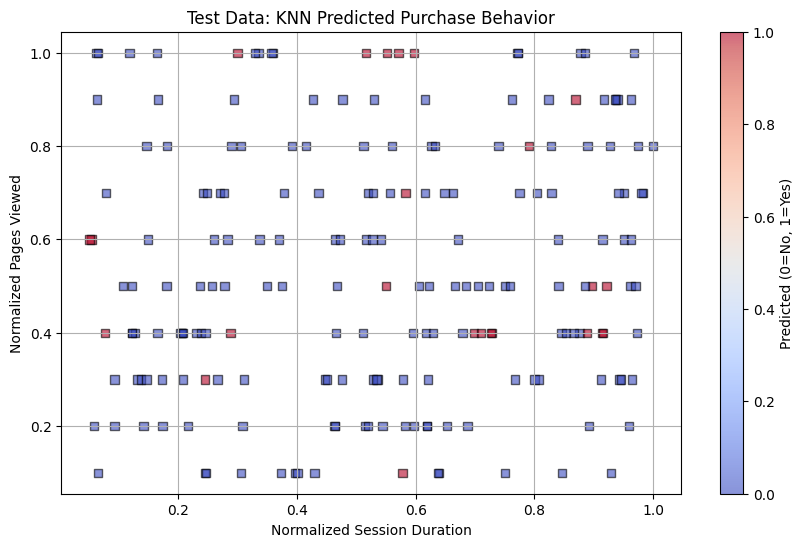

In [ ]:
#KNN
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv('/content/enhanced_website_traffic_data.csv')

# Select features and target
features = ['Session Duration (seconds)', 'Pages Viewed']
target = 'Made Purchase'

# Convert boolean target to integer
df[target] = df[target].astype(int)

# Normalize numeric features
X = df[features].astype(float).values
X = X / np.max(X, axis=0)  # normalization
y = df[target].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Euclidean distance
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# KNN algorithm from scratch
def knn_predict(X_train, y_train, x_test, k=3):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean(x_test, X_train[i])
        distances.append((dist, y_train[i]))
    # Sort and select k nearest
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for (_, label) in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]

# Make predictions
k = 5
predictions = [knn_predict(X_train, y_train, x, k=k) for x in X_test]

# Evaluate
acc = accuracy_score(y_test, predictions)
print(f"KNN Accuracy (k={k}): {acc * 100:.2f}%")

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Purchase", "Purchase"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Website Purchase Prediction (KNN)")
plt.show()

# --- Scatter Plot Visualization ---
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel("Normalized Session Duration")
plt.ylabel("Normalized Pages Viewed")
plt.title("Test Data: Actual Purchase Behavior")
plt.colorbar(label="Made Purchase (0=No, 1=Yes)")
plt.grid(True)
plt.show()

# --- Scatter Plot of Predicted Labels ---
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='coolwarm', edgecolors='k', marker='s', alpha=0.6)
plt.xlabel("Normalized Session Duration")
plt.ylabel("Normalized Pages Viewed")
plt.title("Test Data: KNN Predicted Purchase Behavior")
plt.colorbar(label="Predicted (0=No, 1=Yes)")
plt.grid(True)
plt.show()



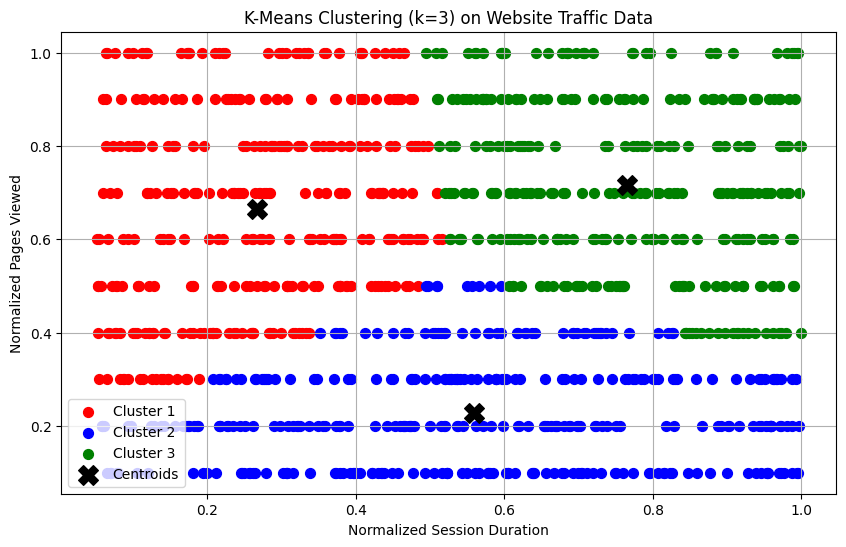

Inertia (lower is better): 62.1609


In [ ]:
# Clustering using K- Means
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/enhanced_website_traffic_data.csv')

# Select two features for clustering
features = ['Session Duration (seconds)', 'Pages Viewed']
X = df[features].astype(float).values

# Normalize features for better clustering
X = X / np.max(X, axis=0)

# Define number of clusters (k)
k = 3  # You can experiment with different values

# Initialize cluster centers (randomly pick k points)
np.random.seed(42)
random_indices = np.random.choice(len(X), size=k, replace=False)
centers = X[random_indices]

# Function to compute Euclidean distance
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# K-Means algorithm
def kmeans(X, centers, k, epochs=100):
    for epoch in range(epochs):
        clusters = [[] for _ in range(k)]

        # Assignment step
        for x in X:
            distances = [euclidean(x, center) for center in centers]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(x)

        # Update step
        new_centers = []
        for cluster in clusters:
            if cluster:  # avoid empty cluster
                new_center = np.mean(cluster, axis=0)
            else:
                new_center = X[np.random.randint(0, len(X))]
            new_centers.append(new_center)
        centers = np.array(new_centers)

    return centers, clusters

# Run KMeans
final_centers, clusters = kmeans(X, centers, k)

# Assign cluster labels
cluster_labels = np.zeros(len(X))
for idx, cluster in enumerate(clusters):
    for point in cluster:
        point_idx = np.where((X == point).all(axis=1))[0][0]
        cluster_labels[point_idx] = idx

# Plot the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange']

plt.figure(figsize=(10, 6))
for i in range(k):
    cluster_points = X[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, color=colors[i], label=f'Cluster {i+1}')

# Plot the final centers
plt.scatter(final_centers[:, 0], final_centers[:, 1], color='black', marker='X', s=200, label='Centroids')
plt.xlabel("Normalized Session Duration")
plt.ylabel("Normalized Pages Viewed")
plt.title(f"K-Means Clustering (k={k}) on Website Traffic Data")
plt.legend()
plt.grid(True)
plt.show()

# Calculate inertia (sum of squared distances to nearest center)
inertia = 0
for i in range(k):
    cluster_points = np.array(clusters[i])
    if len(cluster_points) > 0:
        inertia += np.sum((cluster_points - final_centers[i]) ** 2)
print(f"Inertia (lower is better): {inertia:.4f}")



Epoch 0: Log-Likelihood = -260.1256
Epoch 20: Log-Likelihood = -260.1125
Epoch 40: Log-Likelihood = -260.1013
Epoch 60: Log-Likelihood = -260.0879
Epoch 80: Log-Likelihood = -260.0685


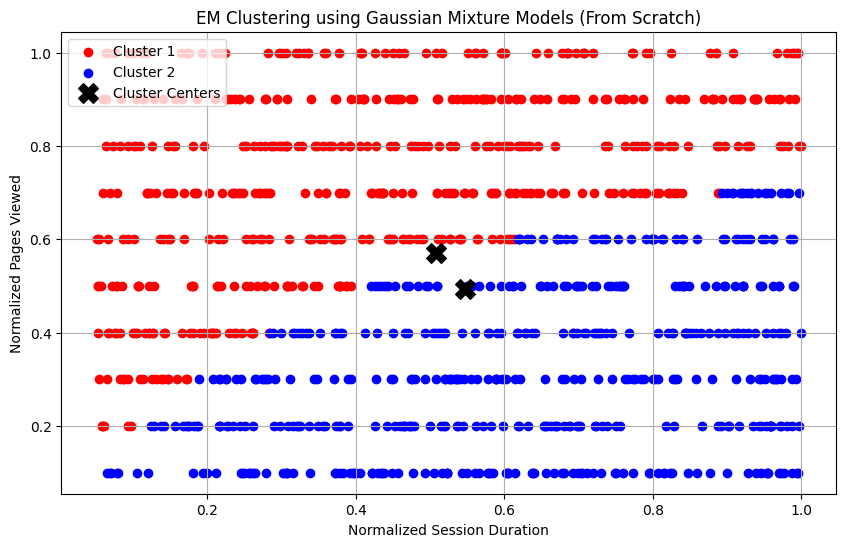

In [ ]:
# Expectation- Maximization for the clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/enhanced_website_traffic_data.csv')

# Select two features for 2D clustering
features = ['Session Duration (seconds)', 'Pages Viewed']
X = df[features].astype(float).values

# Normalize the features
X = X / np.max(X, axis=0)

# Define number of clusters
k = 2  # You can change to 3 or 4 based on elbow method later

# Initialize parameters
np.random.seed(42)
n_samples, n_features = X.shape

# Randomly initialize means
means = X[np.random.choice(n_samples, k, replace=False)]

# Initialize covariance matrices as identity
covariances = np.array([np.identity(n_features) for _ in range(k)])

# Initialize equal mixing coefficients
weights = np.ones(k) / k

# Define Gaussian Probability Density Function
def multivariate_gaussian(x, mean, cov):
    size = x.shape[0]
    det = np.linalg.det(cov)
    norm_const = 1.0 / (np.power((2*np.pi), float(size)/2) * np.power(det, 1.0/2))
    x_mu = x - mean
    inv = np.linalg.inv(cov)
    result = np.exp(-0.5 * (np.dot(np.dot(x_mu.T, inv), x_mu)))
    return norm_const * result

# EM Algorithm
epochs = 100
for epoch in range(epochs):
    # E-Step
    responsibilities = np.zeros((n_samples, k))
    for i in range(n_samples):
        for j in range(k):
            responsibilities[i, j] = weights[j] * multivariate_gaussian(X[i], means[j], covariances[j])
        responsibilities[i, :] /= np.sum(responsibilities[i, :])

    # M-Step
    for j in range(k):
        responsibility = responsibilities[:, j]
        total_responsibility = np.sum(responsibility)

        means[j] = np.sum(X * responsibility[:, np.newaxis], axis=0) / total_responsibility
        x_mu = X - means[j]
        covariances[j] = np.dot((responsibility[:, np.newaxis] * x_mu).T, x_mu) / total_responsibility
        weights[j] = total_responsibility / n_samples

    # Print Log-Likelihood correctly
    if epoch % 20 == 0:
        log_likelihood = 0
        for i in range(n_samples):
            prob = 0
            for j in range(k):
                prob += weights[j] * multivariate_gaussian(X[i], means[j], covariances[j])
            log_likelihood += np.log(prob)
        print(f"Epoch {epoch}: Log-Likelihood = {log_likelihood:.4f}")


# Assign each point to the cluster with highest responsibility
cluster_labels = np.argmax(responsibilities, axis=1)

# Plot the clusters
colors = ['red', 'blue', 'green', 'purple']

plt.figure(figsize=(10, 6))
for i in range(k):
    cluster_points = X[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}')

plt.scatter(means[:, 0], means[:, 1], marker='X', s=200, color='black', label='Cluster Centers')
plt.xlabel('Normalized Session Duration')
plt.ylabel('Normalized Pages Viewed')
plt.title('EM Clustering using Gaussian Mixture Models (From Scratch)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       157
           1       0.00      0.00      0.00        43

    accuracy                           0.79       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.62      0.79      0.69       200

Confusion Matrix:
 [[157   0]
 [ 43   0]]


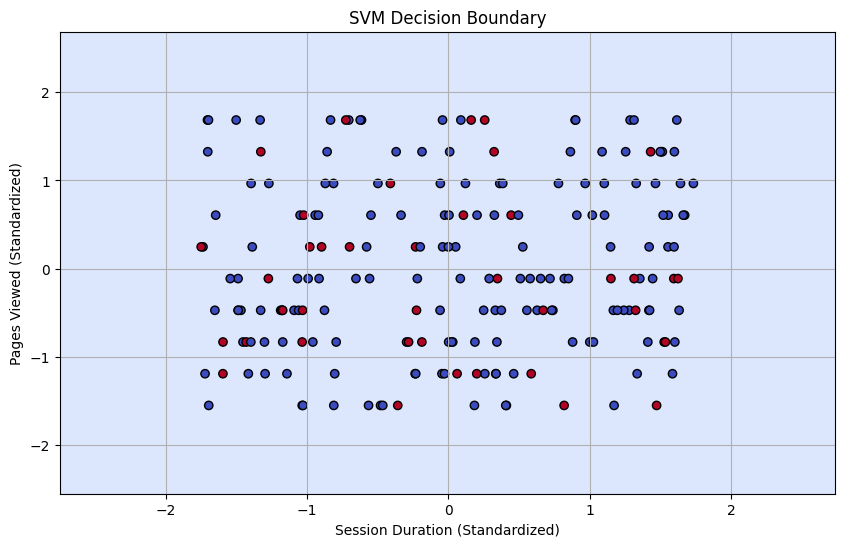

In [ ]:
# Training SVM Classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('/content/enhanced_website_traffic_data.csv')

# Select features and target
features = ['Session Duration (seconds)', 'Pages Viewed']
target = 'Made Purchase'

# Preprocessing
X = df[features].astype(float).values
y = df[target].astype(int).values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize decision boundary
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(10, 6))
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title('SVM Decision Boundary')
    plt.xlabel('Session Duration (Standardized)')
    plt.ylabel('Pages Viewed (Standardized)')
    plt.grid(True)
    plt.show()

# Plot
plot_decision_boundary(X_test, y_test, svm_model)


Explained variance by each component: [0.29653645 0.17565513]


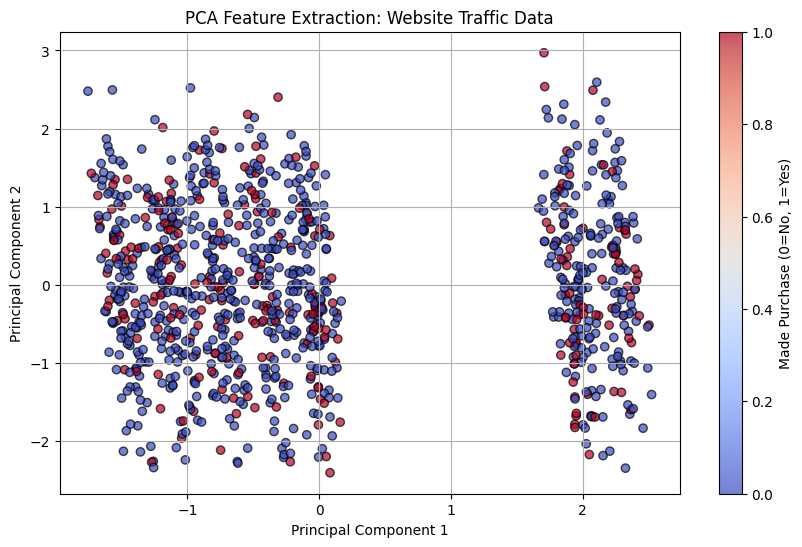

In [ ]:
# PCA Feature Extraction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('/content/enhanced_website_traffic_data.csv')

# Select numerical features only (excluding IDs, strings, etc.)
features = [
    'Session Duration (seconds)', 'Pages Viewed', 'Age',
    'Day of Week', 'Hour of Day', 'Weekend Flag'
]
target = 'Made Purchase'

# Prepare data
X = df[features].astype(float).values
y = df[target].astype(int).values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Show explained variance
print(f"Explained variance by each component: {pca.explained_variance_ratio_}")

# Plot PCA-reduced data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Feature Extraction: Website Traffic Data')
plt.colorbar(scatter, label='Made Purchase (0=No, 1=Yes)')
plt.grid(True)
plt.show()
